## Código de teste prático GAN:
### Apenas um teste utilizando o dataset CIFAR-10 para gerar imagens coloridas

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras import layers
import time
from IPython.display import clear_output


#Verificar GPU disponível
print(tf.config.list_physical_devices('GPU'))

#Variavéis globais
BUFFER_SIZE = 60000
BATCH_SIZE = 32
NOISE_DIM = 100
EPOCHS = 10
IMG_HEIGHT = 32
IMG_WIDTH = 32
CHANNELS = 3

2025-09-17 15:12:05.463458: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-17 15:12:05.509118: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-17 15:12:06.734612: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


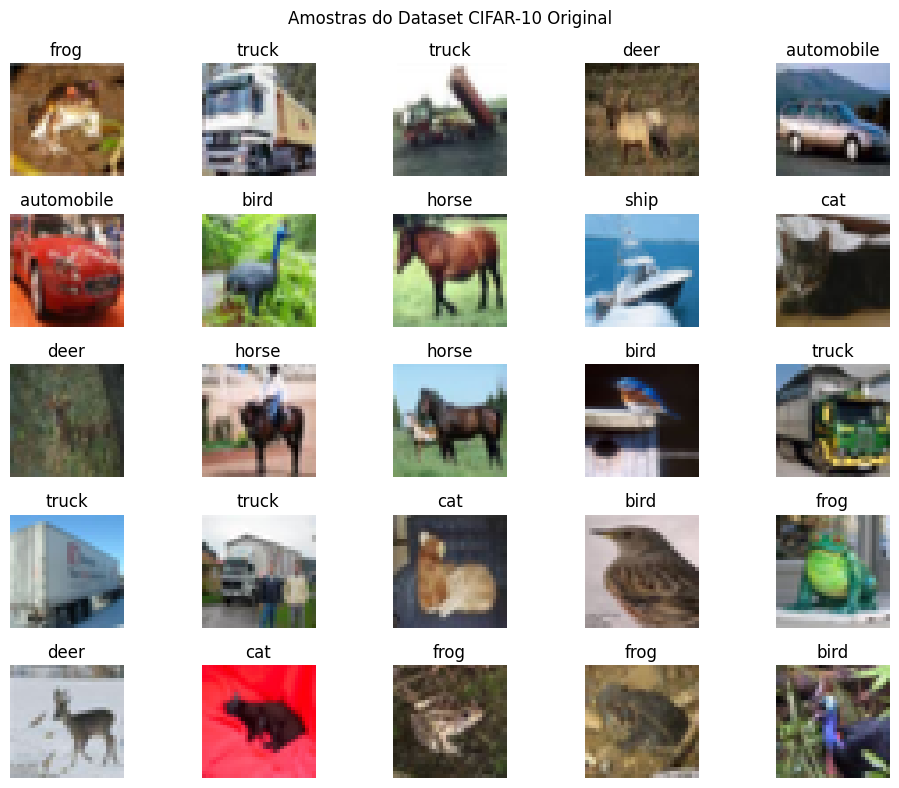

In [2]:
#Carregar dataset CIFAR-10 
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

#Classes do CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

#Visualização dataset
plt.figure(figsize=(10, 8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(f"{class_names[y_train[i][0]]}")
    plt.axis('off')
plt.suptitle("Amostras do Dataset CIFAR-10 Original")
plt.tight_layout()
plt.show()

In [3]:
#Junção dataset
all_images = np.concatenate([x_train, x_test], axis=0)

#Normalização: converter para float32 e normalizar para [-1, 1]
all_images = all_images.astype('float32')
all_images = (all_images - 127.5) / 127.5  

#Criar dataset tensorflow
train_dataset = tf.data.Dataset.from_tensor_slices(all_images)
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

I0000 00:00:1758132730.926995   14144 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4147 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 6GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


/home/lucas/anaconda3/envs/tf_gpu_pip/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16384)          │     1,638,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16384)          │        65,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 512)      │     8,388,608 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 256)    │     2,097,152 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 3)      │        12,288 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,205,056 (46.56 MB)

 Trainable params: 12,170,752 (46.43 MB)

 Non-trainable params: 34,304 (134.00 KB)

2025-09-17 15:12:12.302492: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91300


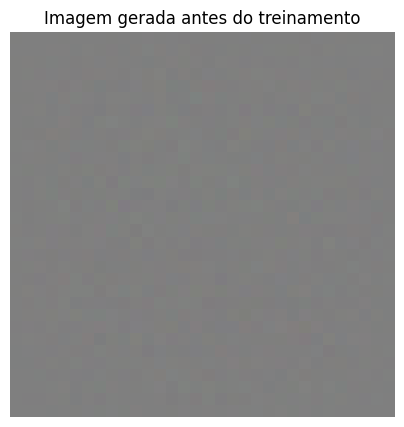

In [4]:
def make_generator_model():
    model = tf.keras.Sequential()
    
    #Camada inicial: transforma ruído em uma feature map 4x4x1024
    model.add(layers.Dense(4*4*1024, use_bias=False, input_shape=(NOISE_DIM,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((4, 4, 1024)))
    
    # Camada 1 8x8x512
    model.add(layers.Conv2DTranspose(512, (4, 4), strides=(2, 2), 
                                   padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    # Camada 2 16x16x256
    model.add(layers.Conv2DTranspose(256, (4, 4), strides=(2, 2), 
                                   padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    # Camada 332x32x3 
    model.add(layers.Conv2DTranspose(3, (4, 4), strides=(2, 2), 
                                   padding='same', use_bias=False, 
                                   activation='tanh'))
    
    return model

#Criar e visualizar o gerador
generator = make_generator_model()
generator.summary()

#Testar o gerador com ruído aleatório
noise = tf.random.normal([1, NOISE_DIM])
generated_image = generator(noise, training=False)

plt.figure(figsize=(5, 5))
plt.imshow((generated_image[0] + 1) / 2)  #Desnormalizar para [0,1]
plt.title("Imagem gerada antes do treinamento")
plt.axis('off')
plt.show()

In [5]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    
    #Camada 1 32x32x3 -> 16x16x64 
    model.add(layers.Conv2D(64, (4, 4), strides=(2, 2), padding='same',
                          input_shape=[IMG_HEIGHT, IMG_WIDTH, CHANNELS]))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))
    
    #Camada 2 8x8x128
    model.add(layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))
    
    #Camada 3 4x4x256
    model.add(layers.Conv2D(256, (4, 4), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))
    
    #Camada de saída
    model.add(layers.Flatten())
    model.add(layers.Dense(1))  
    
    return model

#Criar discriminador
discriminator = make_discriminator_model()
discriminator.summary()

#Testar discriminador
decision = discriminator(generated_image)
print(f"Decisão do discriminador (antes do treinamento): {decision}")
print("Valores próximos de 0 = fake, próximos de 1 = real")

/home/lucas/anaconda3/envs/tf_gpu_pip/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/lucas/anaconda3/envs/tf_gpu_pip/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 128)      │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 664,513 (2.53 MB)

 Trainable params: 663,745 (2.53 MB)

 Non-trainable params: 768 (3.00 KB)

Decisão do discriminador (antes do treinamento): [[0.00025508]]
Valores próximos de 0 = fake, próximos de 1 = real


In [6]:
#Função de perda
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

#Otimizadores com diferentes learning rates
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

print(f"Learning rate do gerador: {generator_optimizer.learning_rate.numpy()}")
print(f"Learning rate do discriminador: {discriminator_optimizer.learning_rate.numpy()}")

Learning rate do gerador: 9.999999747378752e-05
Learning rate do discriminador: 0.00019999999494757503


In [7]:
#Variáveis para armazenar o progresso
seed = tf.random.normal([16, NOISE_DIM])  

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, NOISE_DIM])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
    
    #Calcular gradientes
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    
    #Aplicar gradientes
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return gen_loss, disc_loss

def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    
    fig = plt.figure(figsize=(8, 8))
    
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        #Desnormalizar de [-1,1] para [0,1]
        img = (predictions[i] + 1) / 2
        plt.imshow(img)
        plt.axis('off')
    
    plt.suptitle(f'Época {epoch}')
    plt.tight_layout()
    plt.show()



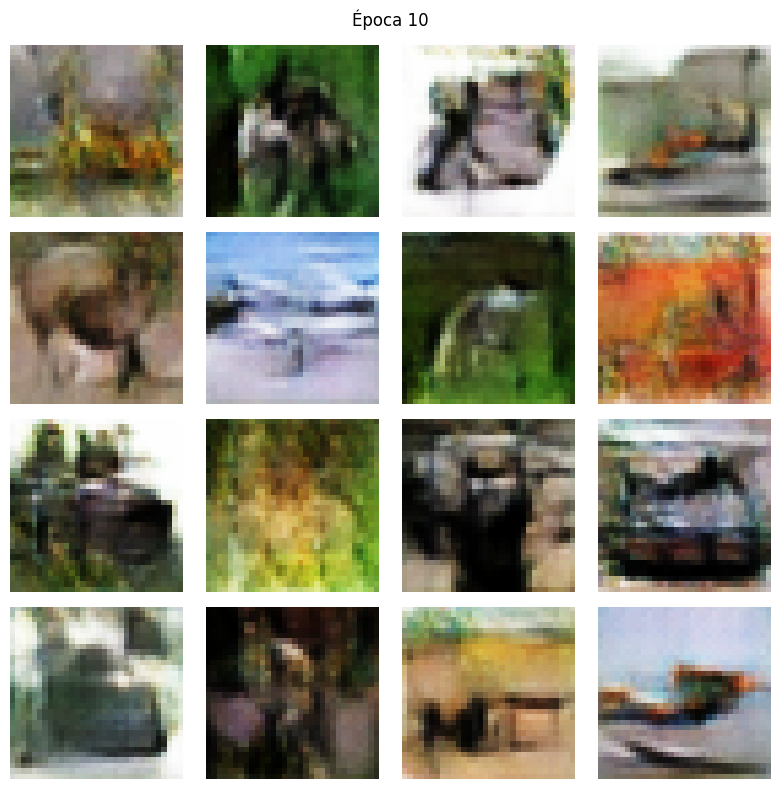

Época 10/10
Tempo: 74.77 seg
Perda Gerador: 2.8290
Perda Discriminador: 0.5706
--------------------------------------------------


In [8]:
def train(dataset, epochs):
    
    #Listas para armazenar histórico de perdas
    gen_losses = []
    disc_losses = []
    
    for epoch in range(epochs):
        start = time.time()
        
        epoch_gen_loss = []
        epoch_disc_loss = []
        
        #Treinar em todos os batches
        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)
            epoch_gen_loss.append(gen_loss)
            epoch_disc_loss.append(disc_loss)
        
        #Calcular perdas médias da época
        avg_gen_loss = tf.reduce_mean(epoch_gen_loss)
        avg_disc_loss = tf.reduce_mean(epoch_disc_loss)
        gen_losses.append(avg_gen_loss)
        disc_losses.append(avg_disc_loss)
        
        #Mostrar progresso
        if (epoch + 1) % 5 == 0:
            clear_output(wait=True)
            generate_and_save_images(generator, epoch + 1, seed)
        
        #Log de progresso
        print(f'Época {epoch + 1}/{epochs}')
        print(f'Tempo: {time.time()-start:.2f} seg')
        print(f'Perda Gerador: {avg_gen_loss:.4f}')
        print(f'Perda Discriminador: {avg_disc_loss:.4f}')
        print('-' * 50)
    
    return gen_losses, disc_losses

#Executar treinamento
print("Iniciando treinamento...")
print(f"Épocas: {EPOCHS}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Imagens por época: {len(list(train_dataset)) * BATCH_SIZE}")

gen_losses, disc_losses = train(train_dataset, EPOCHS)

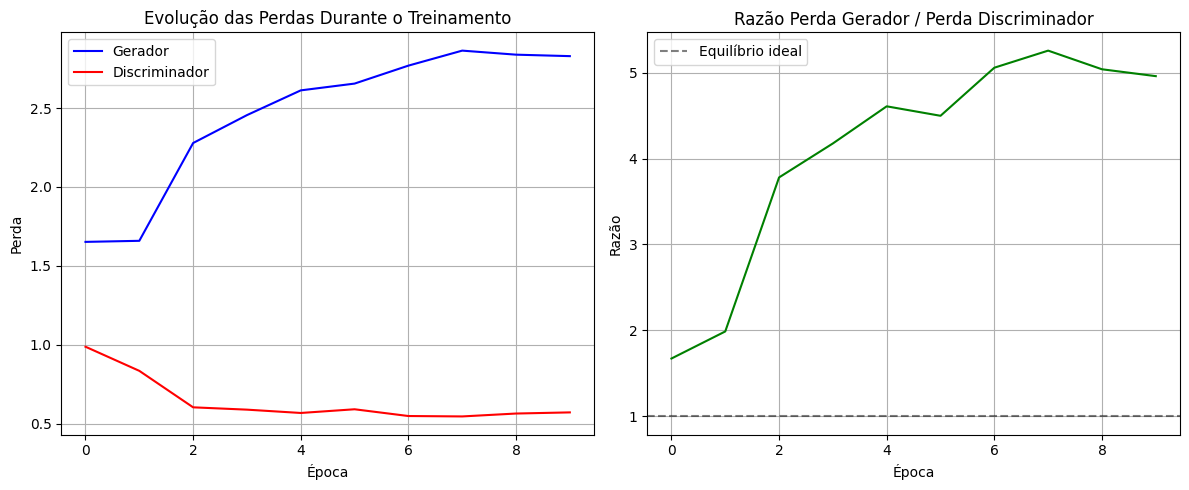

Perda final do gerador: 2.8290
Perda final do discriminador: 0.5706
Razão final: 4.9582

Razão próxima de 1.0 indica bom equilíbrio entre gerador e discriminador


In [12]:
#Plotar evolução das perdas
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(gen_losses, label='Gerador', color='blue')
plt.plot(disc_losses, label='Discriminador', color='red')
plt.title('Evolução das Perdas Durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
#Calcular razão das perdas para avaliar equilíbrio
ratio = [g/d for g, d in zip(gen_losses, disc_losses)]
plt.plot(ratio, color='green')
plt.title('Razão Perda Gerador / Perda Discriminador')
plt.xlabel('Época')
plt.ylabel('Razão')
plt.axhline(y=1, color='black', linestyle='--', alpha=0.5, label='Equilíbrio ideal')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#Estatísticas finais
print(f"Perda final do gerador: {gen_losses[-1]:.4f}")
print(f"Perda final do discriminador: {disc_losses[-1]:.4f}")
print(f"Razão final: {gen_losses[-1]/disc_losses[-1]:.4f}")
print("\nRazão próxima de 1.0 indica bom equilíbrio entre gerador e discriminador")

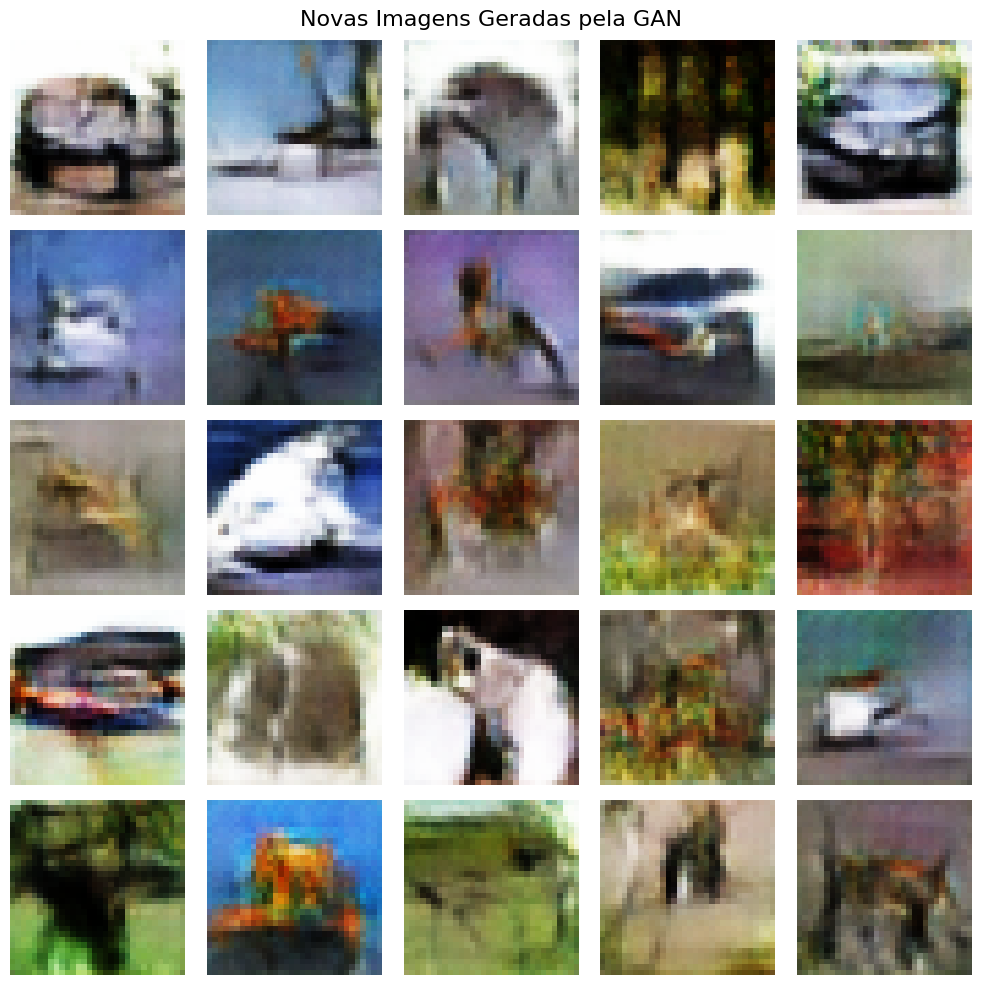

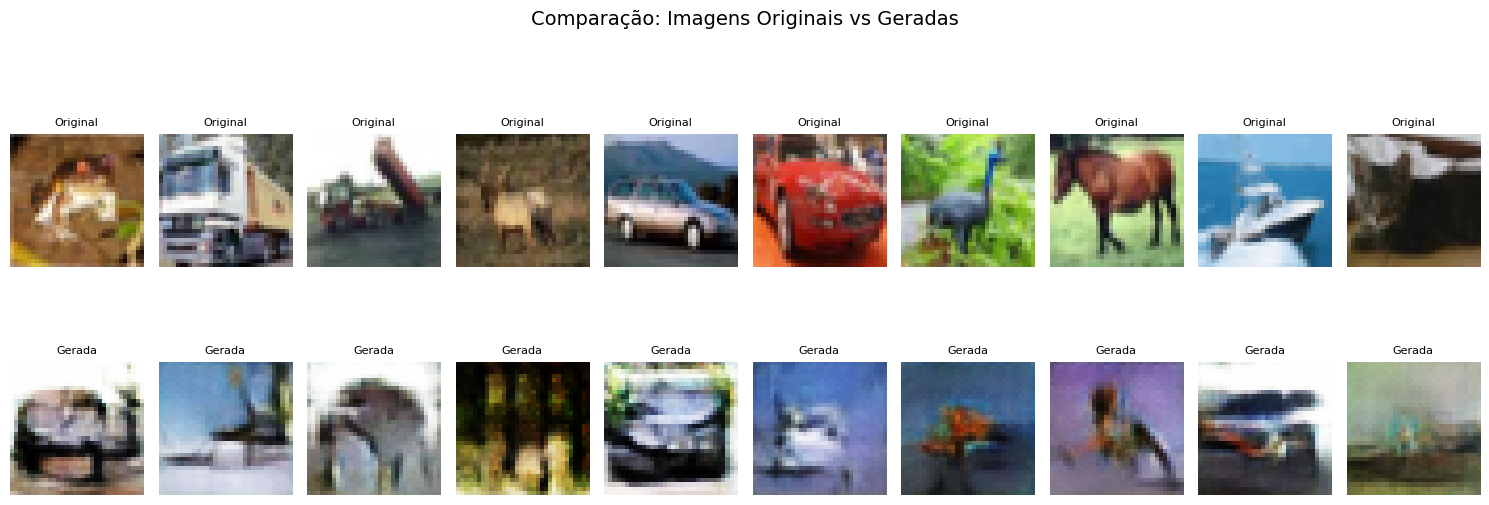

In [10]:
#Gerar um conjunto de novas imagens
num_examples_to_generate = 25
noise = tf.random.normal([num_examples_to_generate, NOISE_DIM])
generated_images = generator(noise, training=False)

#Visualizar imagens geradas
plt.figure(figsize=(10, 10))
for i in range(num_examples_to_generate):
    plt.subplot(5, 5, i+1)
    img = (generated_images[i] + 1) / 2  #Desnormalizar
    plt.imshow(img)
    plt.axis('off')

plt.suptitle('Novas Imagens Geradas pela GAN', fontsize=16)
plt.tight_layout()
plt.show()

#Comparação lado a lado: originais vs geradas
fig, axes = plt.subplots(2, 10, figsize=(15, 6))

#Imagens originais (primeiras 10)
for i in range(10):
    axes[0, i].imshow((all_images[i] + 1) / 2)
    axes[0, i].set_title("Original", fontsize=8)
    axes[0, i].axis('off')

#Imagens geradas (primeiras 10)
for i in range(10):
    axes[1, i].imshow((generated_images[i] + 1) / 2)
    axes[1, i].set_title("Gerada", fontsize=8)
    axes[1, i].axis('off')

plt.suptitle('Comparação: Imagens Originais vs Geradas', fontsize=14)
plt.tight_layout()
plt.show()